# Projet GPT

## Description
Ce projet vise à créer un modèle de langage (LLM) à partir des œuvres de Jules Verne. L'objectif est de développer un modèle capable de générer du texte dans le style de l'auteur. Le but est principalement de m'initier aux transformeurs et au fonctionnement de ses modèles.

## Étapes

1. **Collecte des données**
   - Rassembler les œuvres complètes de Jules Verne.
   - Nettoyer et prétraiter les textes pour éliminer les erreurs et les formats indésirables.

2. **Préparation des données**
   - Tokenisation des textes.
   - Création d'un corpus d'entraînement en découpant les textes en séquences de longueur fixe.

3. **Construction du modèle**

4. **Entraînement du modèle**

5. **Évaluation du modèle**
   - Comparer les résultats avec des textes originaux de Jules Verne.

6. **Amélioration et ajustements**
   - Affiner le modèle en utilisant des techniques de régularisation et d'optimisation.
   - Réentraîner le modèle si nécessaire.

7. **Déploiement (peut-être)**
   - Déployer le modèle sur une plateforme accessible pour générer du texte à la demande.
   - Créer une interface utilisateur pour interagir avec le modèle.

# I. Collecte des données

On recupere les fichiers textes depuis le Projet Gutenberg

In [2]:
import os
import requests
import regex as re
import matplotlib.pyplot as plt

RAW_DATA_PATH = "data/raw/"

os.makedirs(RAW_DATA_PATH, exist_ok=True)

base_query_url = "https://gutendex.com/books"

# ALL Jules verne books, in french, in txt format

query = {
    "languages": "fr",
    "search": "verne",
    "mime_type": "text/plain",
}

response = requests.get(base_query_url, params=query)
response.raise_for_status()
data = response.json()

total_books = data["count"]
print(f"Total number of books: {total_books}")

for book in data["results"]:
    print(f"Title : {book['title']} by {book['authors'][0]['name']} in format {book['formats']}")

Total number of books: 47
Title : L'île mystérieuse by Verne, Jules in format {'text/html': 'https://www.gutenberg.org/ebooks/14287.html.images', 'text/html; charset=iso-8859-1': 'https://www.gutenberg.org/files/14287/14287-h/14287-h.htm', 'application/epub+zip': 'https://www.gutenberg.org/ebooks/14287.epub3.images', 'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/14287.kf8.images', 'text/plain; charset=utf-8': 'https://www.gutenberg.org/files/14287/14287-0.txt', 'application/rdf+xml': 'https://www.gutenberg.org/ebooks/14287.rdf', 'image/jpeg': 'https://www.gutenberg.org/cache/epub/14287/pg14287.cover.medium.jpg', 'application/octet-stream': 'https://www.gutenberg.org/cache/epub/14287/pg14287-h.zip', 'text/plain; charset=us-ascii': 'https://www.gutenberg.org/ebooks/14287.txt.utf-8'}
Title : Voyage au Centre de la Terre by Verne, Jules in format {'text/html': 'https://www.gutenberg.org/ebooks/4791.html.images', 'application/epub+zip': 'https://www.gutenberg.org/ebook

On filtre uniquement les fichiers textes

In [3]:
downloaded_books = 0

format_hierarchy = [
    "text/plain; charset=utf-8",
    "text/plain; charset=iso-8859-1",
    "text/plain; charset=us-ascii"
]

for book in data["results"]:
    for format in format_hierarchy:
        if format in book["formats"]:
            
            url = book["formats"][format]
            print(f"Downloading {book['title']} from {url} in format {format}")
            response = requests.get(url)
            response.raise_for_status()

            file_path = f"{RAW_DATA_PATH}/{book['title']}.txt"

            if os.path.exists(file_path):
                print(f"File {file_path} already exists, skipping")
            else:
                try:
                    with open(f"{RAW_DATA_PATH}/{book['title']}.txt", "wb") as f:
                        f.write(response.content)

                    print(f"Downloaded {book['title']}")
                except Exception as e:
                    print(f"Could not download {book['title']}: {e}")
                    continue

            break
    else:
        print(f"Could not find a suitable format for {book['title']}")
        continue


    downloaded_books += 1

print(f"Downloaded {downloaded_books} books")

File data/raw//L'île mystérieuse.txt already exists, skipping
File data/raw//Voyage au Centre de la Terre.txt already exists, skipping
Could not find a suitable format for Le tour du monde en quatre-vingts jours
File data/raw//Vingt mille lieues sous les mers.txt already exists, skipping
Downloaded Le tour du monde en quatre-vingts jours
File data/raw//Vingt mille Lieues Sous Les Mers — Complete.txt already exists, skipping
File data/raw//Cinq Semaines En Ballon.txt already exists, skipping
File data/raw//Les voyageurs du XIXe siècle.txt already exists, skipping
File data/raw//Le Tour du monde en quatre-vingts jours.txt already exists, skipping
File data/raw//De la terre à la lune: trajet direct en 97 heures 20 minutes.txt already exists, skipping
Downloaded De la terre à la lune, trajet direct en 97 heures 20 minutes
File data/raw//Le tour du monde en quatre-vingts jours.txt already exists, skipping
File data/raw//Les enfants du capitaine Grant.txt already exists, skipping
File data/r

On trie à la main les 30 résultats

In [4]:
to_be_deleted = [
    "Autour de la Lune.txt",
    "De la terre à la lune, trajet direct en 97 heures 20 minutes.txt",
    "L'île à hélice.txt",
    "La Jangada: Huit cent lieues sur l'Amazone.txt",
    "La maison à vapeur: Voyage à travers l'Inde septentrionale.txt",
    "Le Docteur Ox.txt",
    "Le tour du monde en quatre-vingts jours.txt",
    "Les Indes Noires.txt",
    "Un billet de loterie: (Le numéro 9672).txt",
    "Vingt Mille Lieues Sous Les Mers — Part 1.txt",
]

for file in to_be_deleted:
    file_path = f"{RAW_DATA_PATH}/{file}"
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted {file_path}")
    else:
        print(f"File {file_path} does not exist, skipping")

Deleted data/raw//Autour de la Lune.txt
Deleted data/raw//De la terre à la lune, trajet direct en 97 heures 20 minutes.txt
Deleted data/raw//L'île à hélice.txt
Deleted data/raw//La Jangada: Huit cent lieues sur l'Amazone.txt
Deleted data/raw//La maison à vapeur: Voyage à travers l'Inde septentrionale.txt
Deleted data/raw//Le Docteur Ox.txt
Deleted data/raw//Le tour du monde en quatre-vingts jours.txt
Deleted data/raw//Les Indes Noires.txt
Deleted data/raw//Un billet de loterie: (Le numéro 9672).txt
Deleted data/raw//Vingt Mille Lieues Sous Les Mers — Part 1.txt


## Analyse du corpus final

Book L'île mystérieuse.txt has 212942 words and 1228222 characters
Book Voyage au Centre de la Terre.txt has 75157 words and 437146 characters
Book Vingt mille lieues sous les mers.txt has 153934 words and 908360 characters
Book Vingt mille Lieues Sous Les Mers — Complete.txt has 151970 words and 900442 characters
Book Cinq Semaines En Ballon.txt has 87552 words and 508844 characters
Book Les voyageurs du XIXe siècle.txt has 163800 words and 962776 characters
Book Le Tour du monde en quatre-vingts jours.txt has 76348 words and 449195 characters
Book De la terre à la lune: trajet direct en 97 heures 20 minutes.txt has 60275 words and 360628 characters
Book Les enfants du capitaine Grant.txt has 208661 words and 1228299 characters
Book Autour de la lune.txt has 63199 words and 382346 characters
Book Les naufragés du Jonathan.txt has 154636 words and 896101 characters
Book Les tribulations d'un chinois en Chine.txt has 67069 words and 385827 characters
Book Michel Strogoff: De Moscou a Ir

/tmp/ipykernel_3687/643430360.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(books, rotation=90)
/tmp/ipykernel_3687/643430360.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(books, rotation=90)


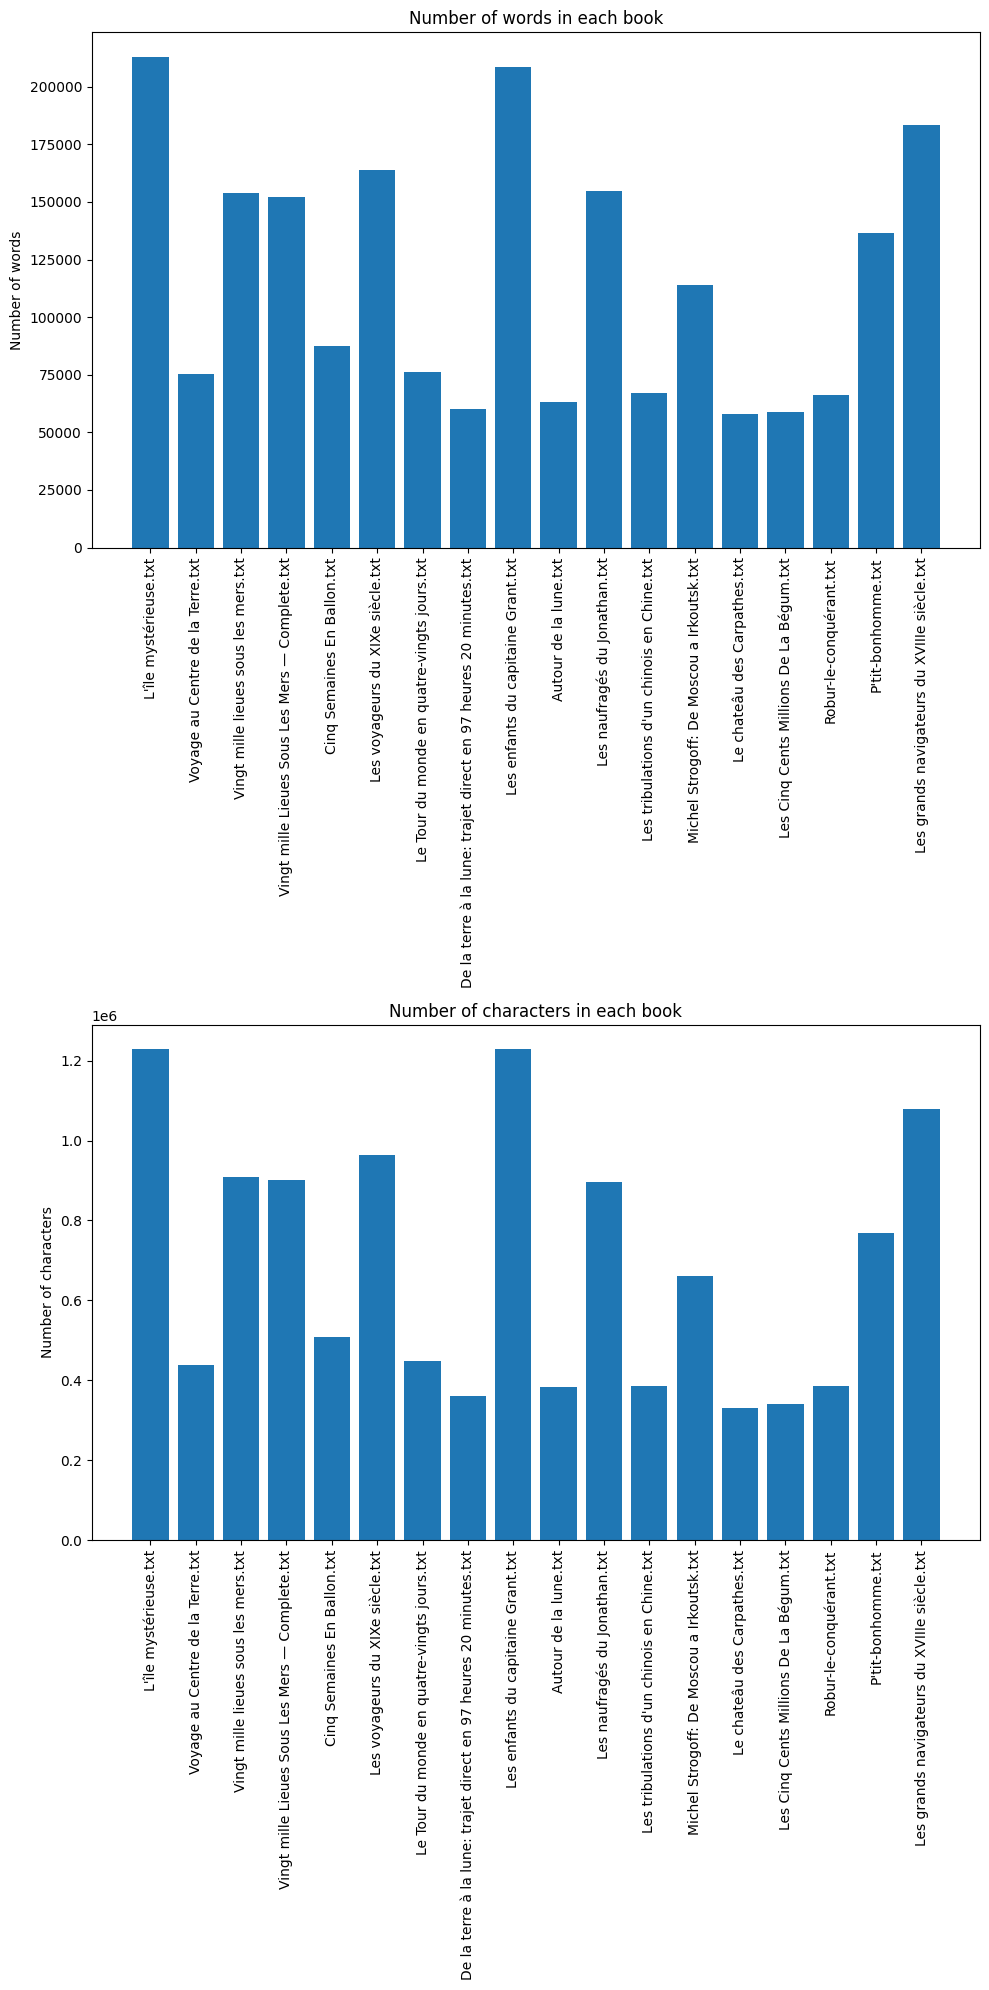

Total number of words: 2092074, total number of characters: 12209105
Number of unique words: 57221
Number of unique characters: 183


In [5]:
data = {}
all_unique_words = set()
all_unique_characters = set()

books = os.listdir(RAW_DATA_PATH)
for book in books:
    with open(f"{RAW_DATA_PATH}/{book}", "r") as f:
        text = f.read()
        words = re.findall(r"\p{L}+", text)
        print(f"Book {book} has {len(words)} words and {len(text)} characters")
        data[book] = {
            "words": len(words),
            "characters": len(text)
        }
        all_unique_characters.update(text)
        all_unique_words.update(words)

fig, ax = plt.subplots(2, 1, figsize=(10, 20))

books = list(data.keys())
words = [data[book]["words"] for book in books]
characters = [data[book]["characters"] for book in books]

ax[0].bar(books, words)
ax[0].set_title("Number of words in each book")
ax[0].set_ylabel("Number of words")
ax[0].set_xticklabels(books, rotation=90)

ax[1].bar(books, characters)
ax[1].set_title("Number of characters in each book")
ax[1].set_ylabel("Number of characters")
ax[1].set_xticklabels(books, rotation=90)

plt.tight_layout()
plt.show()

print(f"Total number of words: {sum(words)}, total number of characters: {sum(characters)}")
print(f"Number of unique words: {len(all_unique_words)}")
print(f"Number of unique characters: {len(all_unique_characters)}")

In [6]:
if not os.path.exists("data/out"):
    os.makedirs("data/out")
    
# Let's combine all the books into a single text file
with open("data/out/combined_books.txt", "w") as f:
    for book in books:
        with open(f"{RAW_DATA_PATH}/{book}", "r") as book_file:
            f.write(book_file.read())
            f.write("\n")

print("All books combined into a single file")

All books combined into a single file


# 2. Création du corpus

On commence par tokeniser le texte

In [7]:
TXT_PATH = "data/out/combined_books.txt"

with open(TXT_PATH, "r") as f:
    text = f.read()

import tiktoken

all_unique_characters = sorted(list(all_unique_characters))

stoi = {c: i for i, c in enumerate(all_unique_characters)}
itos = {i: c for i, c in enumerate(all_unique_characters)}

encode = lambda x: [stoi[c] for c in x]
decode = lambda x: "".join([itos[i] for i in x])

print(f"First 10 characters: {text[:10]}")
print(f"First 10 encoded characters: {encode(text[:10])}")
print(f"First 10 decoded characters: {decode(encode(text[:10]))}")

First 10 characters: ﻿The Proje
First 10 encoded characters: [182, 53, 73, 70, 1, 49, 83, 80, 75, 70]
First 10 decoded characters: ﻿The Proje


In [8]:
import torch
torch.manual_seed(42)

encoded_text = torch.tensor(encode(text), dtype=torch.long)
print(f"Encoded text has shape {encoded_text.shape}")
print(f"First 10 encoded characters: {encoded_text[:10]}")

Encoded text has shape torch.Size([12209123])
First 10 encoded characters: tensor([182,  53,  73,  70,   1,  49,  83,  80,  75,  70])


In [9]:
n = int(len(encoded_text) * 0.9)
train_text = encoded_text[:n]
val_text = encoded_text[n:]

In [12]:
context_length = 8
batch_size = 4

def get_batch(split):
    if split == "train":
        text = train_text
    else:
        text = val_text
    elements = torch.randint(0, len(text) - context_length, (batch_size,))
    x = torch.stack([text[e:e+context_length] for e in elements])
    y = torch.stack([text[e+1:e+context_length+1] for e in elements])
    return x, y

print(get_batch("train"))



(tensor([[ 66,  74,  85,   1,  69, 123,  72,  86],
        [ 74,  84,  13,   1,  69,  70,   1,  78],
        [ 70,  13,   1,  66,  81,  83, 122,  84],
        [  1,  84,  86,  75,  70,  85,  13,   1]]), tensor([[ 74,  85,   1,  69, 123,  72,  86,  70],
        [ 84,  13,   1,  69,  70,   1,  78,  66],
        [ 13,   1,  66,  81,  83, 122,  84,   1],
        [ 84,  86,  75,  70,  85,  13,   1,  66]]))


In [ ]:
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        return x